# The  Bernstein-Vazirani Algorithm

## **Victor Onofre**

We are given a $n$ bit function $f: \{0,1 \}^{n} \rightarrow \{ 0,1 \} $. This function is of the form:

$$f_{a}(x) = a \cdot x = a_{0}x_{0} \oplus  a_{1}x_{1} \oplus  a_{2}x_{2} \oplus ...  a_{n}x_{n}  $$

where $a$ is an unknown $n$ bit string. 

**The goal of the Bernstein-Vazirani problem is to find the unknown string $a$**

With a classical computer we can learn the $n$ bits of $a$ by applying $f$ to the $n$ values $x$. Thus the exact query complexity must be at least $n$.


With a **quantum computer** a single query is enough to determine $a$ completely.

First, we remember the action of the hadamard gate $H$ on a single qubit:

$$H|0> = \frac{1}{\sqrt{2}} \Big(|0> + |1> \Big) \quad  H|1> = \frac{1}{\sqrt{2}} \Big(|0> - |1> \Big)  $$

$$H|x> = \frac{1}{\sqrt{2}} \Big(|0> + (-1)^{x}|1> \Big) =  \frac{1}{\sqrt{2}} \sum_{y=0}^{1} (-1)^{xy} |y> $$

If we tensor this together $n$ times (apply $H$ to  and $n$ qubit $|x>_{n}$), we obtain:

$$ H^{\otimes n} |x>_{n} = \frac{1}{2^{n/2}} \sum_{y_{n-1} = 0}^{1}... \sum_{y_{0} =0}^{1} (-1)^{\sum_{j=0}^{n-1} x_{i} y_{j}} |y_{n-1} >... |y_{0}>  = \frac{1}{2^{n/2}} \sum_{y=0}^{2^{n}-1} (-1)^{x \cdot y} |y>_{n}$$ 

For example:

$$ H^{\otimes 2} |10>_{2} = \frac{1}{2^{2/2}}\sum_{y=0}^{2^{2}-1} (-1)^{10 \cdot y} |y>_{2} = \frac{1}{2}\sum_{y=0}^{3} (-1)^{10 \cdot y} |y>_{2} $$

$$ H^{\otimes 2} |10>_{2} =  \frac{1}{2} \Big[ (-1)^{10 \cdot 00} |00> + (-1)^{10 \cdot 01} |01> + (-1)^{10 \cdot 10} |10> + (-1)^{10 \cdot 11} |11> \Big]  $$


$$10 \cdot 00 = 10 \oplus 00  = 0 \oplus 0 = 0$$
$$10 \cdot 01 = 10 \oplus 01  = 0 \oplus 0 = 0$$
$$10 \cdot 10 = 11 \oplus 00  = 1 \oplus 0 = 1$$
$$10 \cdot 11 = 11 \oplus 01  = 1 \oplus 0 = 1$$

where $\oplus$ denotes addition modulo 2:

$$y \oplus 0 = y  \quad y \oplus 1 = \widetilde{y} = 1 - y$$

$$ H^{\otimes 2} |10>_{2} =  \frac{1}{2} \Big[  |00> +  |01> - |10> - |11> \Big]  $$

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector, plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib

In [2]:
style = {'backgroundcolor': 'lightyellow'} # Style of the circuits
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

In [3]:
qreg = QuantumRegister(6)
register1 = ClassicalRegister(5) 

qc = QuantumCircuit(qreg, register1 )

## Initial state

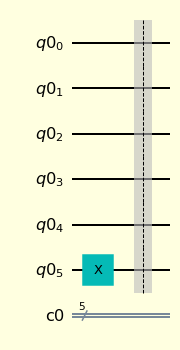

In [4]:
qc.x(5)
qc.barrier()
qc.draw(output='mpl', style=style) 

The initial stae is $ | 0 >_{0} |0>_{1}  |0>_{2} |0>_{3} |0>_{4}  |0>_{5}$, we apply the $x$ gate to the 5th qubit and obtain:

$$ | \psi_{0} > =  (I \otimes I \otimes I \otimes I \otimes I \otimes X) | 0 >_{0} |0>_{1}  |0>_{2} |0>_{3} |0>_{4}  |0>_{5} $$


$$| \psi_{0} > = | 0 >_{0} |0>_{1}  |0>_{2} |0>_{3} |0>_{4}  |1>_{5}   $$

## Apply Hadamard gates

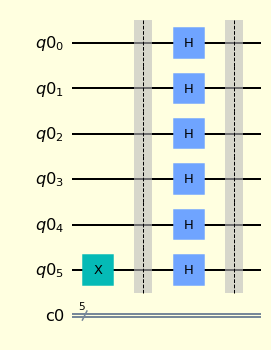

In [5]:
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.h(5)
qc.barrier()
qc.draw(output='mpl', style=style) 

$ H^{\otimes n} |x>_{n} =\frac{1}{2^{n/2}} \sum_{y=0}^{2^{n}-1} (-1)^{x \cdot y} |y>_{n}$

$$ | \psi_{1} > =   (H \otimes H \otimes H \otimes H \otimes H \otimes H) | \psi_{1} > =  (H^{\otimes 5} \otimes H) | 0 >_{0} |0>_{1}  |0>_{2} |0>_{3} |0>_{4}  |1>_{5}  $$

$$ | \psi_{1} > =   (H^{\otimes 4} \otimes H) | 00000 >_{0,1,2,3,4}  |1>_{5} =  \Big ( H^{\otimes 4} | 00000 >_{0,1,2,3,4} \Big) H |1>_{5}  = \Big ( H^{\otimes 4} | 00000 >_{4} \Big)  \frac{1}{\sqrt{2}} \Big(|0>_{5} - |1>_{5} \Big) $$


$$ | \psi_{1} > =   \Big (\frac{1}{2^{4/2}} \sum_{x=0}^{2^{4}-1} (-1)^{00000 \cdot x} |x>_{4} \Big)  \frac{1}{\sqrt{2}} \Big(|0>_{5} - |1>_{5} \Big) $$


$$ | \psi_{1} > =   \Big (\frac{1}{4} \sum_{x=0}^{15} |x>_{4} \Big)  \frac{1}{\sqrt{2}} \Big(|0>_{5} - |1>_{5} \Big) $$

## Oracle $U_{f}$
## Function f(x)

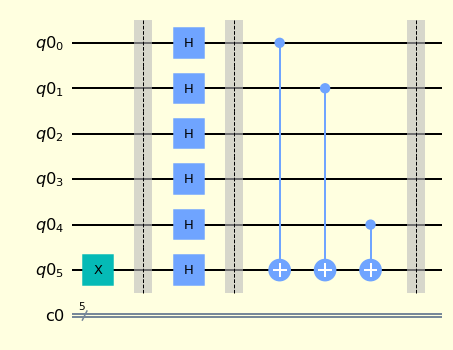

In [6]:
qc.cx(0,5)
qc.cx(1,5)
qc.cx(4,5)
qc.barrier()
qc.draw(output='mpl', style=style) 

$$ | \psi_{2} > = U_{f} | \psi_{1} > =   \Big (\frac{1}{4} \sum_{y=0}^{15} (-1)^{f(x)} |x>_{4} \Big)  \frac{1}{\sqrt{2}} \Big(|0>_{5} - |1>_{5} \Big) $$

## Apply Hadamard gates

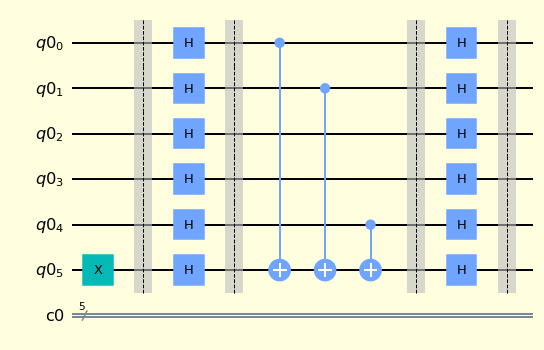

In [7]:
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.h(5)
qc.barrier()
qc.draw(output='mpl', style=style) 

$$ | \psi_{3} > = H^{\otimes 4} | \psi_{2} > =   \Big (\frac{1}{4} \sum_{y=0}^{15} (-1)^{f(x)} H^{\otimes 4} |x>_{4} \Big)  \frac{1}{\sqrt{2}} \Big(|0>_{5} - |1>_{5} \Big) $$

$$ | \psi_{3} > =   \frac{1}{4} \Big[ \sum_{x=0}^{15} (-1)^{f(x)} \Big( \frac{1}{4} \sum_{y=0}^{15} (-1)^{x \cdot y}  |y>_{4} \Big)\Big]  \frac{1}{\sqrt{2}} \Big(|0>_{5} - |1>_{5} \Big) $$

$$ | \psi_{3} > =    \frac{1}{8} \Big[ \sum_{x=0}^{15} \sum_{y=0}^{15} (-1)^{f(x) + x \cdot y}  |y>_{4} \Big)\Big]  \frac{1}{\sqrt{2}} \Big(|0>_{5} - |1>_{5} \Big) $$

$$ | \psi_{3} > =    \frac{1}{8} \Big[ \sum_{x=0}^{15} \sum_{y=0}^{15} (-1)^{a \cdot x + x \cdot y}  |y>_{4} \Big)\Big]  \frac{1}{\sqrt{2}} \Big(|0>_{5} - |1>_{5} \Big) $$

$$  \sum_{x=0}^{15} (-1)^{a \cdot x + x \cdot y} = \prod_{j=0}^{4} \sum_{x_{j}=0}^{1} (-1)^{ (a_{j}+ y_{j}) x_{j} }  $$

At least one term in the product vanishes unless every bit $y_{j}$ of $y$ is equal to the corresponding bit  $a_{j}$ of $a$ – i.e. unless $y = a$

$$|\psi_{3} >  = H^{\otimes 5} U_{f} H^{\otimes 5} |00000>_{0,1,2,3,4} |1>_{5}$$

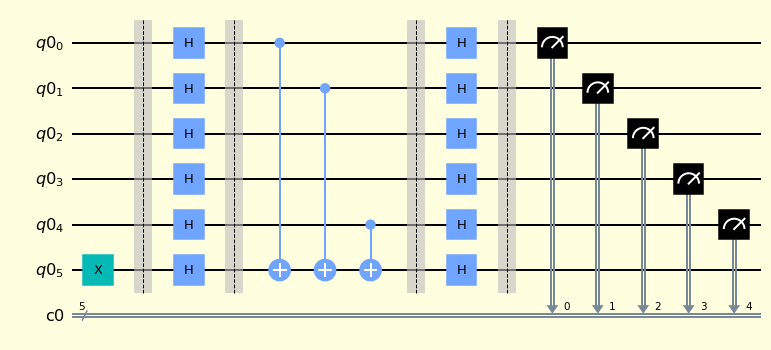

In [8]:
qc.measure(0, register1[0])
qc.measure(1, register1[1])
qc.measure(2, register1[2])
qc.measure(3, register1[3])
qc.measure(4, register1[4])
qc.draw(output='mpl', style=style)

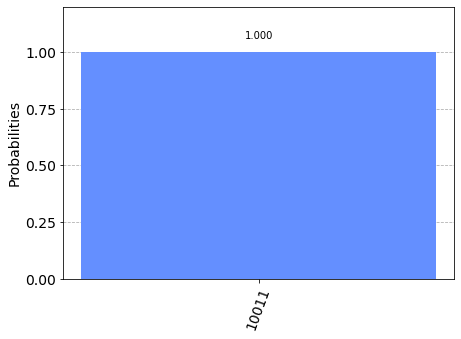

In [9]:
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)